### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go # we can not use express plots
from plotly.subplots import make_subplots # creating subplots

### Utility functions

In [5]:
!jt -t oceans16 -f roboto -fs 9 -N -T -cellw 90%

In [6]:
def clear_quotes_all(df):
    col_list = df.columns
    for col in col_list:
        df[col] = df[col].replace("'", "")
    return df

def create_categorical(xparam, mapping):
    x = xparam.replace("'","") 
    if x in mapping.keys():
        return mapping[x]
    else:
        return -1    

def clear_quotes(x):
    return x.replace("'", "").replace('"','')
    

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head(2).T

,0,1
destination,No Urgent Place,No Urgent Place
passanger,Alone,Friend(s)
weather,Sunny,Sunny
temperature,55,80
time,2PM,10AM
coupon,Restaurant(<20),Coffee House
expiration,1d,2h
gender,Female,Female
age,21,21
maritalStatus,Unmarried partner,Unmarried partner


In [ ]:
fix education to shorter names
def clean(s):
    s.replace(' ', '').replace('$', '').replace('-','_')

In [12]:
data['income'] = data['income'].apply(lambda x: x.replace(' ', '').replace('$', '').replace('-','_'))

In [15]:
data['car'].fillna('others').value_counts()

car
others                                      12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

<Axes: xlabel='time', ylabel='count'>

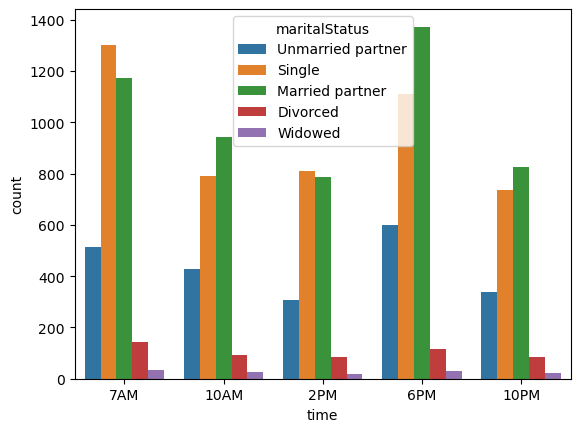

In [113]:
sns.countplot(data, x='time', order=['7AM', '10AM', '2PM', '6PM', '10PM'], hue='maritalStatus')

2. Investigate the dataset for missing or problematic data.

<Axes: >

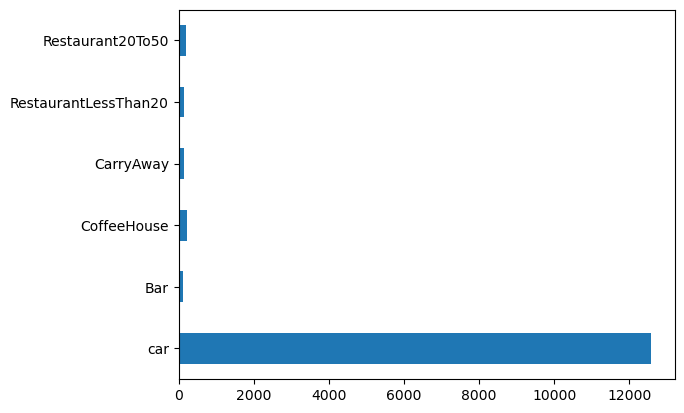

In [31]:
data.isnull().sum()[data.isnull().sum()>0].plot(kind='barh')

Cars column has most of the values to be 'NaN'/null. This data though important, does not help determine the impact. 

In [33]:
data.car.fillna('others').value_counts()

car
others                                      12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon? 



56.8% of the people chose to accept the coupon. 

In [16]:
def prdata.Y.value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

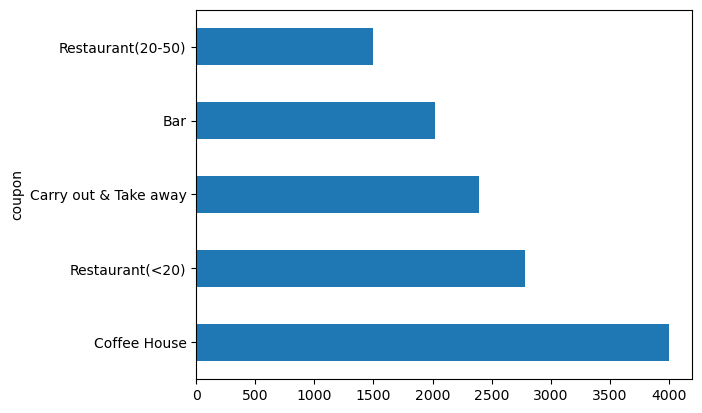

In [42]:
data.coupon.fillna('others').value_counts().plot(kind='barh')

In [16]:
coupon_categories = {'Coffee House': 'coffee_house','Restaurant(<20)': 'restaurant_lt_20','Restaurant(20-50)': 'restaurant_bt_20_50','Carry out & Take away': 'take_away', 'Bar': 'restaurant_bar'}
data['coupon_cat'] = data['coupon'].apply(create_categorical, mapping=coupon_categories)

6. Use a histogram to visualize the temperature column.

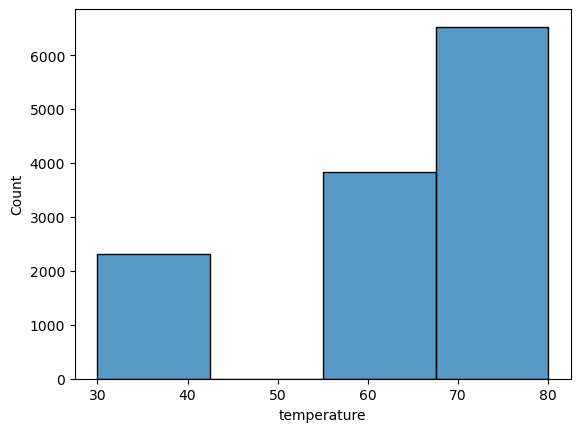

In [117]:
sns.histplot(data, x='temperature', bins=4);

In [115]:
data.temperature.value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
df_bar_only_coupons = data[data['coupon'] == 'Bar']
df_bar_only_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coupon_cat
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,restaurant_bar
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,restaurant_bar
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,restaurant_bar
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,restaurant_bar
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,restaurant_bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,restaurant_bar
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,restaurant_bar
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,restaurant_bar
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,restaurant_bar


2. What proportion of bar coupons were accepted?


The analysis is to deep dive into what portion of the sample/population is Bar coupons. As seen below it constitutes to approximately, 15.9%. The next step would be check of the 15.6% what proportion was accepted. So, as we see again the `Distribution by Bar coupon acceptance` pie chart its like 41% 

In [104]:
# Create a coupons distribution dataframe (coupons is a categorical column) and also create a another dataframe by Accepted or not Accepted 

dist_coupons = data.groupby('coupon')[['coupon']].count().rename(columns={'coupon': 'count'}).reset_index()
dist_coupons['isBar'] = dist_coupons['coupon'] == 'Bar'
dist_bar_coupons = df_bar_only_coupons.groupby('Y')[['Y']].count().rename(columns={'Y': 'count'}).reset_index()

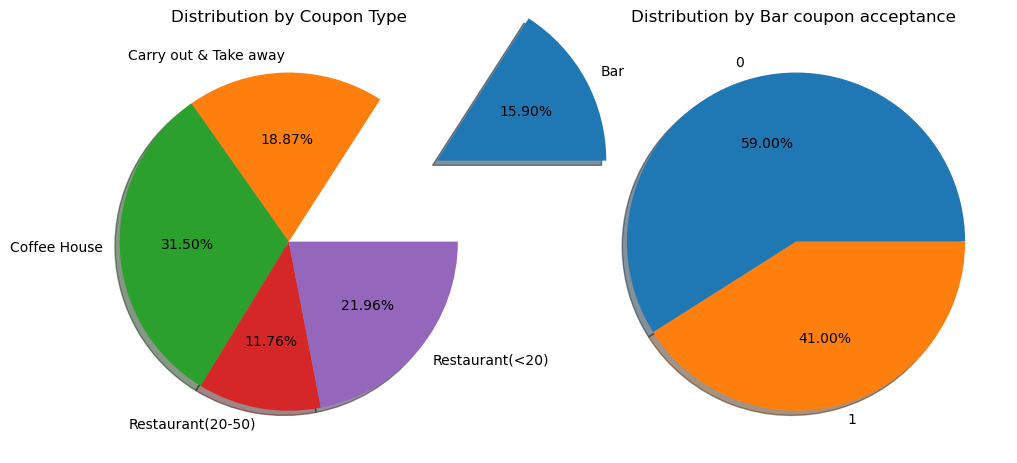

In [109]:
# Plot the distribution to understand how Bar coupons and its acceptance
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 8])
ax0.pie(dist_coupons['count'],labels= dist_coupons['coupon'], autopct='%1.2f%%', explode=dist_coupons['isBar'], shadow=True)
ax1.pie(dist_bar_coupons['count'],labels= dist_bar_coupons['Y'], autopct='%1.2f%%', shadow=True)

ax0.set_title('Distribution by Coupon Type')
ax1.set_title('Distribution by Bar coupon acceptance ');

In [118]:
# Calculate the proportion of the accepted bar coupons to the overall bar coupons
accepted_bar_only = df_bar_only_coupons.query('Y == 1').shape[0]
proportion = accepted_bar_only/df_bar_only_coupons.shape[0]
print(f'Proportion of bar coupons which were accepted : {proportion * 100 : .2f}%')

Proportion of bar coupons which were accepted :  41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [30]:
# create two arrays one for <=3 times and another for >3 which would be used for separating the 
lt_list=['never','less1','1~3']
ge_list=['4~8', 'gt8']

df_bar_only_coupons_accepted = df_bar_only_coupons.query('Y == 1')[['Bar']]
# people who went fewer times and accepted 
lt = df_bar_only_coupons_accepted.query('Bar in @lt_list').shape[0]/df_bar_only_coupons_accepted.query('Bar in @ge_list').shape[0]
print(f'The acceptance rate of those who went to bar 3 or fewer times was {lt:.2f} times MORE than those who when more frequently')

The acceptance rate of those who went to bar 3 or fewer times was 4.35 times MORE than those who when more frequently


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [72]:
age_order = ['below21','21', '26','31','36','41','46','50plus']
data['age_cat'] = pd.Categorical(data['age'], categories=age_order, ordered=True)

In [74]:
data['age_cat'].value_counts().sort_values()

age_cat
below21     547
46          686
41         1093
36         1319
50plus     1788
31         2039
26         2559
21         2653
Name: count, dtype: int64

In [35]:
gt_25_gt_1 = df_bar_only_coupons.query('Bar not in ["never","less1"] and age not in ["below21","21"]').shape[0]
ge_25_le_1 = df_bar_only_coupons.query('Bar in ["never","less1"] and age in ["below21","21"]').shape[0]
acceptance_rate = gt_25_gt_1/ge_25_le_1
acceptance_rate
print(f'The acceptance rate of drivers who are going to bars more than once and over the age of 25 is approximately {acceptance_rate:.2f}')

The acceptance rate of drivers who are going to bars more than once and over the age of 25 is approximately 1.35


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  